In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Reading file

In [193]:
# reading the data file 
data = pd.read_csv('full_data.csv')
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
995,71.0,68.545888
996,46.0,47.334876
997,55.0,54.090637
998,62.0,63.297171


In [194]:
data.shape

(1000, 2)

In [195]:
data.describe()

,x,y
count,1000.000000,999.000000
mean,53.771157,50.319804
std,113.747929,29.089111
min,0.000000,-3.839981
25%,25.000000,25.185430
50%,50.000000,49.926397
75%,75.000000,74.475252
max,3530.157369,108.871618


In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y       999 non-null    float64
dtypes: float64(2)
memory usage: 15.8 KB


In [197]:
data.isna().sum()

x    0
y    1
dtype: int64

## Removing the missing values

In [198]:
data = data.dropna()

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       999 non-null    float64
 1   y       999 non-null    float64
dtypes: float64(2)
memory usage: 23.4 KB


## Visualization  

<AxesSubplot:xlabel='x', ylabel='y'>

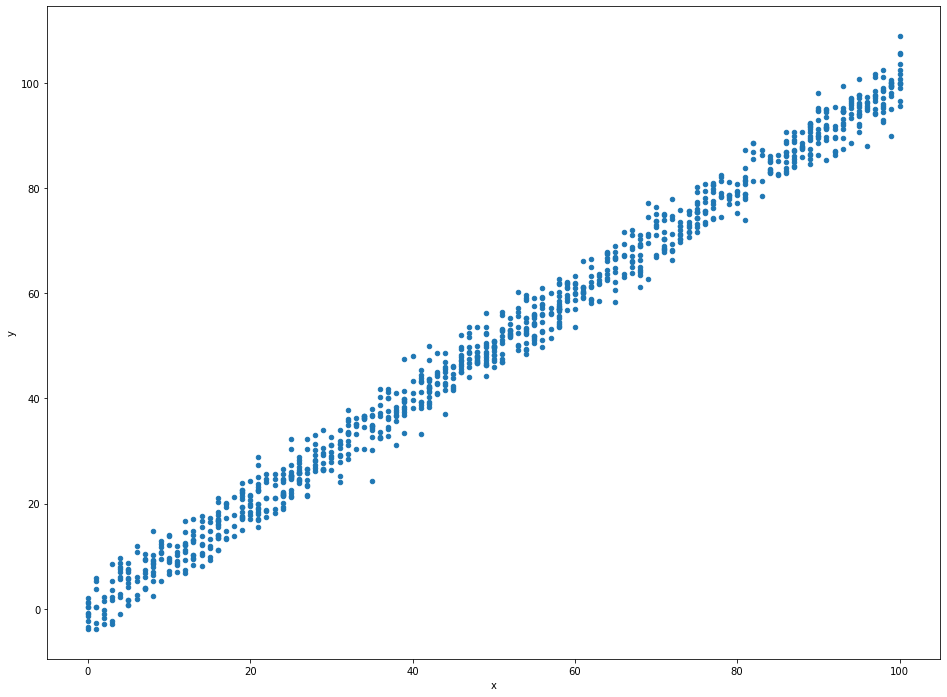

In [200]:
data.plot(kind="scatter", x = 'x', y = 'y', figsize = (16,12))

## Creating X, Y values (train, test)

In [201]:
# values should be in the below format
x = data.iloc[:, :1].values
y = data.iloc[:, 1].values


In [202]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =4)
x_train, x_test, y_train, y_test

(array([[ 65.],
        [  7.],
        [ 75.],
        [ 32.],
        [ 95.],
        [ 48.],
        [ 24.],
        [ 53.],
        [ 35.],
        [ 74.],
        [ 96.],
        [ 80.],
        [ 54.],
        [ 67.],
        [  3.],
        [ 14.],
        [ 59.],
        [ 58.],
        [  0.],
        [ 54.],
        [ 54.],
        [ 55.],
        [ 65.],
        [ 41.],
        [ 99.],
        [ 19.],
        [ 78.],
        [ 16.],
        [ 42.],
        [ 20.],
        [ 34.],
        [ 37.],
        [  8.],
        [ 75.],
        [ 30.],
        [ 79.],
        [ 30.],
        [ 91.],
        [ 72.],
        [ 72.],
        [  8.],
        [ 25.],
        [ 87.],
        [ 12.],
        [ 30.],
        [ 25.],
        [ 13.],
        [ 77.],
        [ 34.],
        [ 12.],
        [ 72.],
        [ 50.],
        [ 95.],
        [ 11.],
        [ 26.],
        [ 35.],
        [ 91.],
        [ 26.],
        [ 98.],
        [ 58.],
        [ 13.],
        [ 93.],
        

## creating model

In [203]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

## checking the intersept and coefficients 

In [204]:
regression.intercept_

-0.04611765987664285

In [205]:
regression.coef_

array([1.00192825])

## For checking r2 and r2_adj

In [206]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='y ~ x', data=data).fit()
lm.conf_int()

,0,1
Intercept,-0.570924,0.150346
x,0.998525,1.010971


In [207]:
lm.pvalues

Intercept    0.252791
x            0.000000
dtype: float64

In [208]:
lm.rsquared

0.9901655735846986

In [209]:
lm.rsquared_adj

0.9901557095662279

## Testing

In [210]:
y_predict = regression.predict(x_test)


In [211]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.9890641092844267

## visualization 

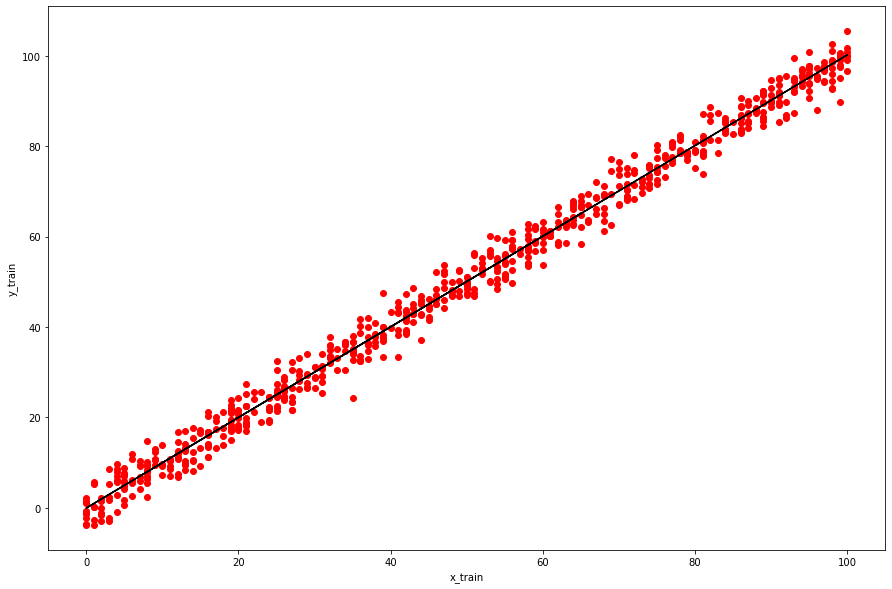

In [212]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x_train, y_train, color = "red" )
plt.plot(x_train, regression.predict(x_train), color= "black")
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.show()

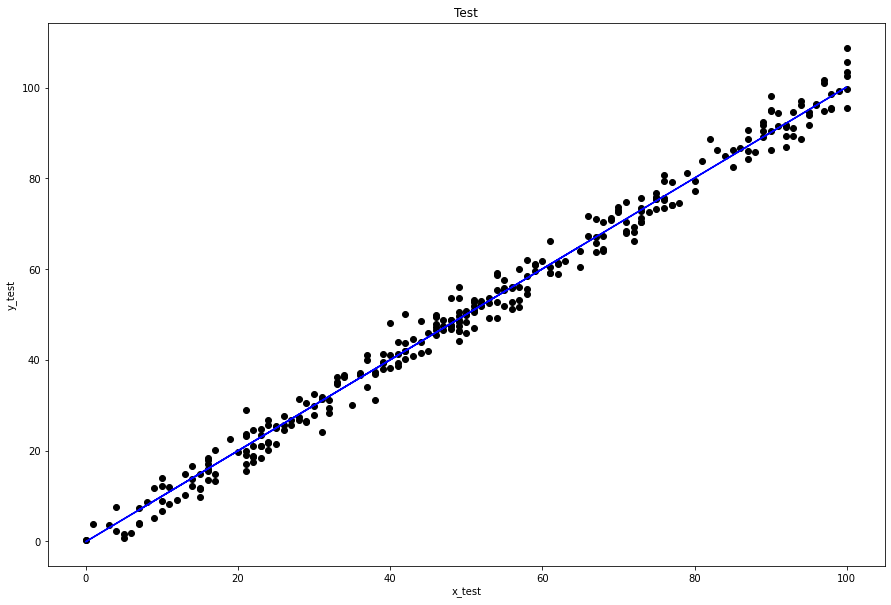

In [213]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x_test, y_test, color = 'black')
plt.plot(x_train, regression.predict(x_train), color='blue')
plt.title("Test")
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.show()

## Sample test

In [214]:
new= regression.predict([[12]])
print(new) 

[11.97702134]


## finding Accuracy

In [215]:
accuracy = regression.score(x_test, y_test)
print('Accuracy = '+ str(accuracy))

Accuracy = 0.9890641092844267


In [216]:
lm = smf.ols(formula='y ~ x', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.004e+05
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        21:49:36   Log-Likelihood:                -2475.4
No. Observations:                 999   AIC:                             4955.
Df Residuals:                     997   BIC:                             4965.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2103      0.184     -1.144      0.253      -0.571       0.150
x              1.0047      0.003    316.830      0.000       0.999       1.011
==============================================================================
Omnibus:                        0.922   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.631   Jarque-Bera (JB):                0.829
Skew:                           0.066   Prob(JB):                        0.661
Kurtosis:                       3.050   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""